<a href="https://colab.research.google.com/github/jjaquezrd/DATA_SCIENCE/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [93]:
Opcion1 = '/content/drive/MyDrive/Data_Science/DataSet/Fraud.csv'
opcion2 = '/content/drive/MyDrive/Data_Science/DataSet/diabetes_data.csv'

In [94]:
df1 = pd.read_csv(Opcion1)
df2 = pd.read_csv(opcion2)

#Proyecto 2 - Ciencia de Datos
## Clasificador de pacientes con diabetes
### Antecedentes:
Dado un set de datos compuesto por informaciones de un determinado grupo de personas evaluadas, se pretende clasificar o diagnosticar en datos futuros cuando una persona puede tener diabetes o no.

*Por lo tanto este es un ejercicio de clasificación*

Fuente de datos: https://www.kaggle.com/datasets/prosperchuks/health-dataset

Para este ejercicio estaremos utilizando exclusivamente los datos del set de Diabetes

### Descripcion del set de datos

El set de datos en el que se basa este ejercicio está compuesto por 18 columnas y 70,692 filas. 

En una revisión inicial del conjunto de datos se observa que los mismos están balanceados, y estandarizados. Así mismo no se observan mayores retos con datos faltantes o datos duplicados.


# Exploracion de datos

In [95]:
df2.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

---
**Observacion**: En el set de datos en estudio no se observan valores nulos, 
adicionalmente no se visualizan datos con formato object, por lo tanto, se descartan datos inconsistentes como por ejemplo (Cat, cat)

---

## Diccionario de datos

**Age:** 13-level age category **(_AGEG5YR see codebook)* 1 = 18-24 9 = 60-64 13 = 80 or older

**Sex:** patient's gender *(1: male; 0: female)*.

**HighChol:** *(0 = no high cholesterol 1 = high cholesterol)*

**CholCheck:** *(0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years)*

**BMI:** Body Mass Index

**Smoker:** Have you smoked at least 100 cigarettes in your entire life? *([Note: 5 packs = 100 cigarettes] 0 = no 1 = yes)*

**HeartDiseaseorAttack:** coronary heart disease (CHD) or myocardial infarction (MI)*( 0 = no 1 = yes)*

**PhysActivity:** physical activity in past 30 days - not including job *(0 = no 1 = yes)*

**Fruits:** Consume Fruit 1 or more times per day *(0 = no 1 = yes)*

**Veggies:** Consume Vegetables 1 or more times per day *(0 = no 1 = yes)*

**HvyAlcoholConsump:** (adult men >=14 drinks per week and adult women>=7 drinks per week) *(0 = no 1 = yes)*

**GenHlth:** Would you say that in general your health is: *(scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor)*

**MentHlth:** days of poor mental health scale 1-30 days

**PhysHlth:** physical illness or injury days in past 30 days scale 1-30

**DiffWalk:** Do you have serious difficulty walking or climbing stairs? *(0 = no 1 = yes)*

**Stroke:** you ever had a stroke. *(0 = no, 1 = yes)*

**HighBP:** *(0 = no high, BP 1 = high BP)*

**Diabetes:** *(0 = no diabetes, 1 = diabetes)*

### Verificacion de datos duplicados

In [97]:
#verificacion de datos duplicados:
print('Numero de filas duplicadas', df2.duplicated().sum())

Numero de filas duplicadas 6672


In [98]:
#se Identificacion 6,672 filas duplicadas.
#se proceden a eliminar los duplicados
df2.drop_duplicates(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64020 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   64020 non-null  float64
 1   Sex                   64020 non-null  float64
 2   HighChol              64020 non-null  float64
 3   CholCheck             64020 non-null  float64
 4   BMI                   64020 non-null  float64
 5   Smoker                64020 non-null  float64
 6   HeartDiseaseorAttack  64020 non-null  float64
 7   PhysActivity          64020 non-null  float64
 8   Fruits                64020 non-null  float64
 9   Veggies               64020 non-null  float64
 10  HvyAlcoholConsump     64020 non-null  float64
 11  GenHlth               64020 non-null  float64
 12  MentHlth              64020 non-null  float64
 13  PhysHlth              64020 non-null  float64
 14  DiffWalk              64020 non-null  float64
 15  Stroke             

---

**Observaciones:** Al verificar el set de datos se observa que los campos que pudieran considerse como nominales
ya estan adecuados, ademas de que son campos de dos valores (0 y 1) o true o false. Por lo 
que entendemos no es necesiario realizar One- hot encorder.

---

In [99]:
# verificacion de la calidad del set de datos y verificar necesidad de normalizacion del mismo
df2.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000
mean,8.607420,0.455983,0.539550,0.973211,30.178554,0.490706,0.159950,0.678366,0.590862,0.771587,0.046345,2.921103,4.130537,6.385020,0.277007,0.068510,0.581756,0.521681
std,2.860717,0.498063,0.498437,0.161466,7.287730,0.499918,0.366563,0.467107,0.491679,0.419813,0.210233,1.107991,8.466301,10.368493,0.447524,0.252621,0.493275,0.499534
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,7.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


---

**Observaciones:** Al verificar las estadisticas para cada columna se observa que los datos estan adecuadamente normalizados. No se requiere ejecutar un proceso adicional sobre los mismos. Asi mismo se observa la no existencia de datos atipicos, ya que las columnas observadas se encuentran dentro de los valores esperados y especificados en el diccionario.

---

# Exploracion de datos

Distribucion del campo objetivo
1.0    33398
0.0    30622
Name: Diabetes, dtype: int64




Text(0.5, 0, 'Diagnostico de diabetes(0= negativo 1 = positivo')

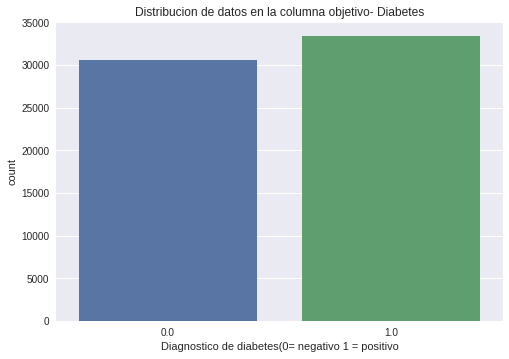

In [106]:
#Grafico para visualizar balanceo de los valores en la columna objetivo
print('Distribucion del campo objetivo')
print(df2['Diabetes'].value_counts())
print('\n')
_= sns.countplot(x='Diabetes', data=df2)
plt.title('Distribucion de datos en la columna objetivo- Diabetes')
plt.xlabel('Diagnostico de diabetes(0= negativo 1 = positivo')

---

**Observaciones:** Se observa una buena distribucion de datos. aprox. 45%/55%

---

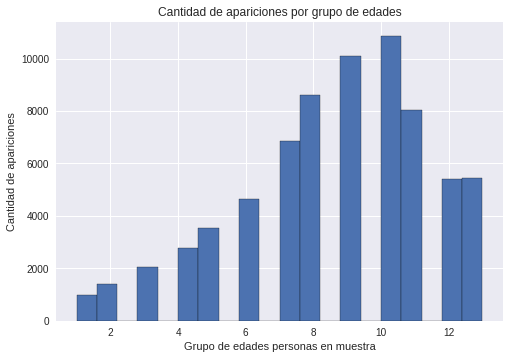

In [82]:
#Historigrama por edades

plt.style.use('seaborn')
df_age = df2['Age']
df_age.hist(bins = 20,
            edgecolor = 'black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Grupo de edades personas en muestra')
plt.ylabel('Cantidad de apariciones')
plt.title('Cantidad de apariciones por grupo de edades');

---

**Observaciones:** Se verifica que la mayor cantidad de personas en el set de datos esta agrupada en los rangos de edad 9 y 10 equivalentes a las edades 60-70 anos

---

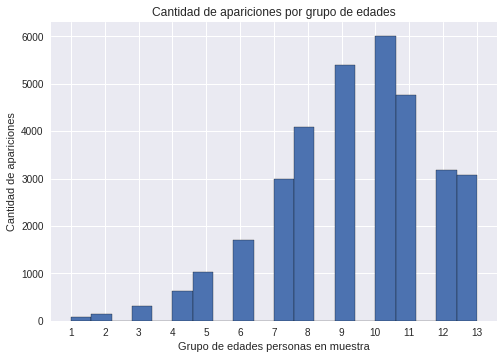

In [112]:
#Historigrama por edades para diabetes positiva
filtro = df2['Diabetes']==1.0
df_filtro = df2[filtro]
plt.style.use('seaborn')
df_age = df_filtro['Age']
df_age.hist(bins = 20,
            edgecolor = 'black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Grupo de edades personas en muestra')
plt.ylabel('Cantidad de apariciones')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.title('Cantidad de apariciones por grupo de edades-Diabetes positiva');

---

**Observaciones:** Se verifica que la mayor cantidad de personas en el set de datos esta agrupada en los rangos de edad 9 y 10 equivalentes a las edades 60-70 anos

---

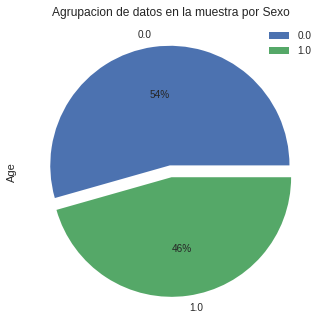

In [21]:
#Grafico de pastel para verificacion de la distribucion de los datos partiendo del sexo
df2.groupby('Sex').count().plot(kind='pie',y='Age', autopct='%1.0f%%',
                                 explode =[0.05,0.05]);
plt.title('Agrupacion de datos en la muestra por Sexo');

---

** Observaciones:** El set de datos presenta que el 54% de las personas en referencia pertenecen al sexo femenino, mientras que el 46% corresponde al sexo masculino

---

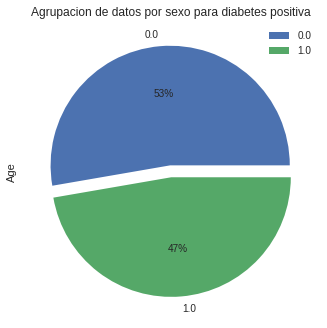

In [113]:
# verificacion de diabetes positiva por genero
filtro = df2['Diabetes']==1.0
df_filtro = df2[filtro]
df_filtro.groupby('Sex').count().plot(kind='pie', y='Age',
                                      autopct='%1.0f%%',
                                 explode =[0.05,0.05]);
plt.title('Agrupacion de datos por sexo para diabetes positiva');

---

**Observaciones:** Se observa que el 48% de las personas senaladas con diabetes corresponden al sexo masculino, mientras que el 52% corresponde a personas del sexo femenino.

---

### Creacion de mapa de calor para identificar posibles correlaciones

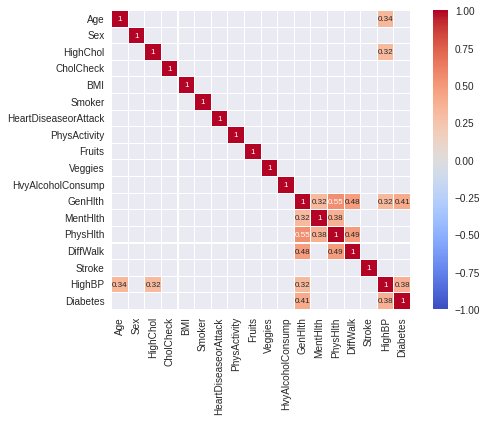

In [54]:
# se analiza el set de datos, en busca de posibles relaciones entre las distintas caracteristicas
# se tomara como parametro inicial una relacion positiva >=3 o una correlacion negativa <=-0.3
corr = df2.corr() 
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

---

**Observaciones:** Los diferentes cuadros de calor indican correlacion entre los renglones de salud, como es de esperarse, la salud general esta influenciada por la salud mental y salud fisica. Las personas que presentan dificultad para caminar impactan en la salud fisica.

Tambien se observa que la alta presion alterial esta correlacionada con la edad y el colesterol

A traves del mapa de calor no se puede establecer una fuerte correlacion entre la diabetes y otros elementos como la alimentacion, alcoholismo o tabaquismo. Mas alla del valor HighBP(Alta presion alterial) el cual presenta una correlacion moderada con la diabetes asi como la salud general.

---

## Conclusiones exploracion de datos:

De los distintos graficos destacados mas arriba podemos interpretar los siguientes resultados:



> Indented block

*   El set de datos presentado presenta una muestra bien distribuida para un ejercicio de creacion de modelos de apredizaje automatico.
*   Existe una mayor incidencia de diabetes en las personas entre edades de 60-70 anos. 
*   Existe una mayor incidencia de diabetes en las personas de sexo femenino.
*   Se observa una posible correlacion entre la diabetes y la alta presion arterial. Asi mismo otros factores de salud estan relacionados directamente, como por ejemplo, la relacion que existe entre la dificultad de subir escaleras con la salud general. La salud general esta relaciionada con la salud fisica y mental.







# Modelado de Datos

In [114]:
#Identificacion de la matriz de caracteristicas y la columna objetivo
y=df2['Diabetes']
X= df2.drop(columns=['Diabetes'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [115]:
#Escalamiento de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Determinacion de parametros para configuracion de los modelos a implementar


> En este bloque estarmos identificando previamente algunos ajustes en los hiperparametros para modelos de arbol de desicion, KNN, bosque aleatorio, con el fin de lograr identificar previamente una configuracion adecuada para la configuracion en ultima instacia de cada modelo.



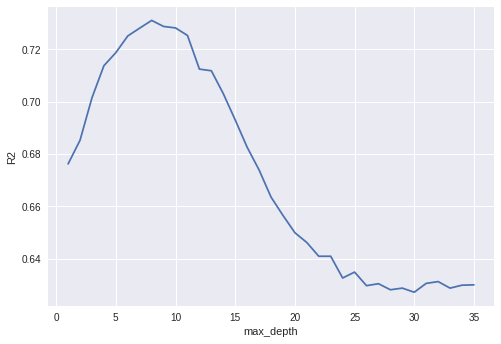

In [116]:
#Arbol de decision

#se crea una funcion para probar todas las profundidades posibles.
#Este modelo de funcion fue tomada del ejercicio de Arbol de Regresion y ajustes
#de coding Dojo.
max_depth_range = list(range(1, 36))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

#visualizar que max_depth lleva una puntuacion R2 mas alta
# Visualicen qué max_depth lleva a una puntuación R2 más alta
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

---

**Configuracion propuesta:** Para el arbol de decision el maximo rendimiento esta en 8 y 9. Por lo que utilizaremos esta configuracion en el modelo.

---

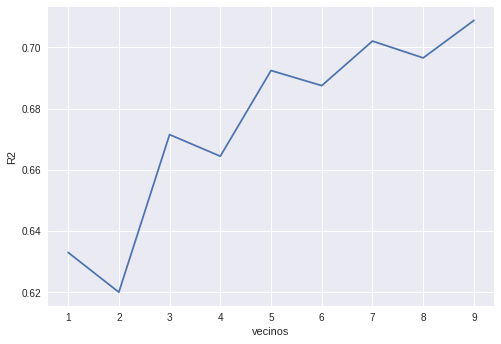

In [117]:
#KN Vecinos
#se crea una funcion para probar todas las profundidades posibles.
#Este modelo de funcion fue tomada del ejercicio de Arbol de Regresion y ajustes
#de coding Dojo.
n_vecinos = list(range(1, 10))
r2 = []
for vecino in n_vecinos:
    knn = KNeighborsClassifier(n_neighbors=vecino)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    r2.append(score)

#Visualizar datos
plt.plot(n_vecinos, r2)
plt.xlabel('vecinos')
plt.ylabel('R2');

**Configuracion propuesta:** Se pretendera configurar el KNN con un numero de 9 u 11 vecinos

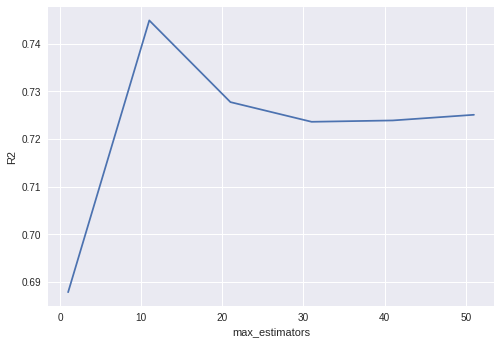

In [86]:
# configuracion para Random Forest
max_n_estimators= list(range(1, 60,10))

r2 = []
for estimator in max_n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, max_depth= estimator,
                             random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    r2.append(score)

#visualizar los datos
plt.plot(max_n_estimators, r2)
plt.xlabel('max_estimators')
plt.ylabel('R2');

---

**Configuracion propuesta:** Se utilizara estimadores 11 y max_depth de 11

---

## Desarrollo de los modelos

In [87]:
#desarrollo de los modelos
#esta extracto de codigo proviene de https://www.kaggle.com/code/prasadshingare/diabetes-hypertension-and-stroke-prediction/notebook
# se establecen configuraciones propuestas en el modulo anterior a fin de obtener resultados optimos

models={
    "Logisitic Regression" :LogisticRegression(random_state=42),
    "Decision Tree" :DecisionTreeClassifier(max_depth=8,random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=11, max_depth=11, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=11),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Entrenando el modelo
    # realizando la prediccion
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Desempeno del conjunto de prueba
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Desempeno del conjunto de entrenamiento
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Desempeno del modelo con datos de entrenamiento (Diabetes)')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Desempeno del modelo con datos de prueba (Diabetes)')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Desempeno del modelo con datos de entrenamiento (Diabetes)
- Accuracy: 0.7478
- F1 score: 0.747727
- Precision: 0.748224
- Recall: 0.747826
----------------------------------
Desempeno del modelo con datos de prueba (Diabetes)
- Accuracy: 0.7467
- Fl score: 0.7466
- Precision: 0.7470
- Recall: 0.7467


Decision Tree
Desempeno del modelo con datos de entrenamiento (Diabetes)
- Accuracy: 0.7515
- F1 score: 0.751043
- Precision: 0.753399
- Recall: 0.751504
----------------------------------
Desempeno del modelo con datos de prueba (Diabetes)
- Accuracy: 0.7411
- Fl score: 0.7405
- Precision: 0.7433
- Recall: 0.7411


Random Forest
Desempeno del modelo con datos de entrenamiento (Diabetes)
- Accuracy: 0.7806
- F1 score: 0.780273
- Precision: 0.782223
- Recall: 0.780588
----------------------------------
Desempeno del modelo con datos de prueba (Diabetes)
- Accuracy: 0.7449
- Fl score: 0.7444
- Precision: 0.7468
- Recall: 0.7449


K-Nearest Neighbors
Desempeno del model

## **Conclusion-Seleccion de modelo** 
Al comparar el rendimiento de los distintos modelos antes configurados se observa un rendimiento similar, no obstante para fines de este ejercicio estaremos seleccionado el algoritmo de **Bosque Aleatorio** ya que el mismo presenta facilidades de configuracion que otros modelos no disponen, por lo que en un futuro es posible, que al modificar otras configuraciones podamos alcanzar un rendimiento superior al presentado que es de 0.74